In [2]:
#17011505 안창언 

# import FinanceDataReader as fdr
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

#from base_functions import *

In [1]:
from base_functions import *     

### 모멘텀 계산 방법

In [2]:
# 데이터 로드
kodex200 = getCloseData("069500", "2021-9-1")
kodex200

Date
2021-09-01    41200
2021-09-02    40823
2021-09-03    41087
2021-09-06    41230
2021-09-07    40984
              ...  
2022-10-14    29055
2022-10-17    29075
2022-10-18    29450
2022-10-19    29210
2022-10-20    28925
Name: Close, Length: 278, dtype: int64

In [3]:
# 리밸런싱 일자
rebalDate = getRebalancingDate(kodex200)
rebalDate

DatetimeIndex(['2021-09-30', '2021-10-29', '2021-11-30', '2021-12-30',
               '2022-01-28', '2022-02-28', '2022-03-31', '2022-04-29',
               '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [4]:
# 리밸런싱 일자 종가 데이터
priceOnRebalDate =  kodex200.loc[rebalDate]
priceOnRebalDate

Date
2021-09-30    39387
2021-10-29    38126
2021-11-30    36757
2021-12-30    39153
2022-01-28    35656
2022-02-28    36005
2022-03-31    36472
2022-04-29    35433
2022-05-31    35363
2022-06-30    30808
2022-07-29    32385
2022-08-31    32230
2022-09-30    28275
2022-10-20    28925
Name: Close, dtype: int64

In [5]:
n = 1
rebalanceDataSet = pd.concat([priceOnRebalDate, priceOnRebalDate.shift(n).fillna(0)], axis=1)
rebalanceDataSet

,Close,Close
Date,,
2021-09-30,39387,0.0
2021-10-29,38126,39387.0
2021-11-30,36757,38126.0
2021-12-30,39153,36757.0
2022-01-28,35656,39153.0
2022-02-28,36005,35656.0
2022-03-31,36472,36005.0
2022-04-29,35433,36472.0
2022-05-31,35363,35433.0


**n개월 모멘텀(수익률을 이렇게 표현) = 현재 가격 / n개월 전 가격**  

In [6]:
# n개월 모멘텀 구하기
# n개월 모멘텀 = 현재 가격 / n개월 전 가격
# n개월 수익률과 같은 개념

n = 1 # 1개월전 대비 현재의 수익률

momentum = (priceOnRebalDate / priceOnRebalDate.shift(n)).fillna(0)
data_df = pd.DataFrame(momentum)

In [7]:
monthlyDataSet = pd.concat([priceOnRebalDate, priceOnRebalDate.shift(n).fillna(0), data_df], axis=1)
monthlyDataSet.columns = ['당월종가', '전월종가', '상승율']
monthlyDataSet

,당월종가,전월종가,상승율
Date,,,
2021-09-30,39387,0.0,0.000000
2021-10-29,38126,39387.0,0.967984
2021-11-30,36757,38126.0,0.964093
2021-12-30,39153,36757.0,1.065185
2022-01-28,35656,39153.0,0.910684
2022-02-28,36005,35656.0,1.009788
2022-03-31,36472,36005.0,1.012970
2022-04-29,35433,36472.0,0.971512
2022-05-31,35363,35433.0,0.998024


**n개월 모멘텀 스코어: if n개월 모멘텀 > 1, 1, 0 (수익률이 1보다 크면 1, 1보가 작거나 같으면 0)**  


In [8]:
# n개월 모멘텀 스코어
# n개월 모멘텀 스코어: if n개월 모멘텀 > 1, 1, 0
n = 1
momentumScore = np.where(priceOnRebalDate / priceOnRebalDate.shift(n) > 1, 1, 0)
momentumScore_df = pd.DataFrame(momentumScore, index=rebalDate)
momentumScoreDataSet = pd.concat([monthlyDataSet, momentumScore_df.fillna(0)], axis=1)
momentumScoreDataSet.columns = ['당월종가', '전월종가', '상승율', '1개월 모멘텀']
momentumScoreDataSet


,당월종가,전월종가,상승율,1개월 모멘텀
Date,,,,
2021-09-30,39387,0.0,0.000000,0
2021-10-29,38126,39387.0,0.967984,0
2021-11-30,36757,38126.0,0.964093,0
2021-12-30,39153,36757.0,1.065185,1
2022-01-28,35656,39153.0,0.910684,0
2022-02-28,36005,35656.0,1.009788,1
2022-03-31,36472,36005.0,1.012970,1
2022-04-29,35433,36472.0,0.971512,0
2022-05-31,35363,35433.0,0.998024,0


**n개월 평균 모멘텀 스코어: 1~n개월 모멘텀 스코어의 평균**

In [9]:
n = 12
avgMomentumScore = 0
for i in range(1, n+1):
    avgMomentumScore = np.where(priceOnRebalDate / priceOnRebalDate.shift(i) > 1, 1, 0) + avgMomentumScore
    data_df = pd.DataFrame(avgMomentumScore, index=rebalDate)

    rebalanceDataSet = pd.concat([priceOnRebalDate, priceOnRebalDate.shift(i).fillna(0), dat]a_df], axis=1)
    rebalanceDataSet.columns=['당월종가', f'{i}전월 종가', f'{i}개월 모멘텀']

    print(f"\n{i}개월 단위 모멘텀")
    print(rebalanceDataSet)



    


    




1개월 단위 모멘텀
             당월종가   1전월 종가  1개월 모멘텀
Date                               
2021-09-30  39387      0.0        0
2021-10-29  38126  39387.0        0
2021-11-30  36757  38126.0        0
2021-12-30  39153  36757.0        1
2022-01-28  35656  39153.0        0
2022-02-28  36005  35656.0        1
2022-03-31  36472  36005.0        1
2022-04-29  35433  36472.0        0
2022-05-31  35363  35433.0        0
2022-06-30  30808  35363.0        0
2022-07-29  32385  30808.0        1
2022-08-31  32230  32385.0        0
2022-09-30  28275  32230.0        0
2022-10-20  28925  28275.0        1

2개월 단위 모멘텀
             당월종가   2전월 종가  2개월 모멘텀
Date                               
2021-09-30  39387      0.0        0
2021-10-29  38126      0.0        0
2021-11-30  36757  39387.0        0
2021-12-30  39153  38126.0        2
2022-01-28  35656  36757.0        0
2022-02-28  36005  39153.0        1
2022-03-31  36472  35656.0        2
2022-04-29  35433  36005.0        0
2022-05-31  35363  36472.0        0
2022

In [10]:
# 총 모멘텀 평균 
avgMomentumScore = avgMomentumScore / n
avgMomentumScore

array([0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.08333333, 0.16666667, 0.        , 0.        , 0.        ,
       0.08333333, 0.08333333, 0.        , 0.08333333])

### 평균모멘텀 스코어에 따른 투자 비중 계산

In [11]:
# 데이터 로드
kodex200 = getCloseData("069500", "2019-01-10", "2022-7-30") # 코스피200 ETF
kodex10Bond = getCloseData("152380", "2019-01-10", "2022-7-30") # kodex 국고채 10년물 etf

kodex200_trunc = kodex200.truncate(before="2019-12-20")
kodex10Bond_trunc = kodex10Bond.truncate(before="2019-12-20")

# kodex200 = 069500
# kodex10Bond = 152380
# S&P500 = SPY
# 미국 7-10 국채 = IEF

closeDataSet = pd.concat([kodex200, kodex10Bond], axis=1)
closeDataSet.columns = ['kodex200', 'kodex10Bond']
closeDataSet.dropna(inplace=True)

closeDataSet_trunc = pd.concat([kodex200_trunc, kodex10Bond])
closeDataSet.columns = ['kodex200', 'kodex10Bond']
closeDataSet.dropna(inplace=True)




In [12]:
# 리밸런싱 일자
rebalDate = getRebalancingDate(closeDataSet)
# 리밸런싱 일자 종가 데이터
priceOnRebalDate =  closeDataSet.loc[rebalDate]

In [14]:
# 매월 평균 모멘텀 스코어
avgMomentumScore.sum(axis=1)

Date
2019-01-31    0.000000
2019-02-28    0.083333
2019-03-29    0.166667
2019-04-30    0.333333
2019-05-31    0.333333
2019-06-28    0.583333
2019-07-31    0.583333
2019-08-30    0.583333
2019-09-30    0.750000
2019-10-31    0.750000
2019-11-29    1.083333
2019-12-30    1.416667
2020-01-31    1.666667
2020-02-28    1.166667
2020-03-31    0.666667
2020-04-29    0.916667
2020-05-29    1.333333
2020-06-30    1.666667
2020-07-31    2.000000
2020-08-31    1.583333
2020-09-29    1.666667
2020-10-30    1.333333
2020-11-30    1.166667
2020-12-30    1.083333
2021-01-29    1.000000
2021-02-26    1.000000
2021-03-31    1.000000
2021-04-30    1.000000
2021-05-31    1.000000
2021-06-30    1.250000
2021-07-30    1.333333
2021-08-31    1.083333
2021-09-30    0.333333
2021-10-29    0.583333
2021-11-30    0.250000
2021-12-30    0.333333
2022-01-28    0.000000
2022-02-28    0.083333
2022-03-31    0.166667
2022-04-29    0.000000
2022-05-31    0.000000
2022-06-30    0.000000
2022-07-29    0.333333
dtype:

In [15]:
# 평균 모멘텀 스코어에 따른 투자 비중 계산
weight = avgMomentumScore.divide(avgMomentumScore.sum(axis=1), axis=0).fillna(0)
weight

,kodex200,kodex10Bond
Date,,
2019-01-31,0.000000,0.000000
2019-02-28,0.000000,1.000000
2019-03-29,0.000000,1.000000
2019-04-30,0.500000,0.500000
2019-05-31,0.000000,1.000000
2019-06-28,0.285714,0.714286
2019-07-31,0.142857,0.857143
2019-08-30,0.000000,1.000000
2019-09-30,0.333333,0.666667


In [16]:
# 주식, 채권의 비중이 모두 0인 구간에는 현금으로 보유합니다.
weight['cash'] = np.where(weight.sum(axis=1) == 0, 1, 0)
weight

,kodex200,kodex10Bond,cash
Date,,,
2019-01-31,0.000000,0.000000,1
2019-02-28,0.000000,1.000000,0
2019-03-29,0.000000,1.000000,0
2019-04-30,0.500000,0.500000,0
2019-05-31,0.000000,1.000000,0
2019-06-28,0.285714,0.714286,0
2019-07-31,0.142857,0.857143,0
2019-08-30,0.000000,1.000000,0
2019-09-30,0.333333,0.666667,0


### 함수화

In [17]:
def getWeightByAvgMomentumScore(closeDataSet, n = 12):
    """
    평균 모멘텀 스코어를 기반으로 한 투자 비중 구하기
    closeDataSet: 종가 데이터
    n: 모멘텀 기간 1~n
    return: 투자비중 weight df, 평균모멘텀 스코어 df
    """
    avgMomentumScore = 0 # 평모스 초기값
    priceOnRebalDate = closeDataSet.loc[getRebalancingDate(closeDataSet)] # 리밸런싱 일자의 가격 데이터
    
    # 1 ~ n개월 모멘텀 스코어 합
    for i in range(1, n+1):
        avgMomentumScore = np.where(priceOnRebalDate / priceOnRebalDate.shift(i) > 1, 1, 0) + avgMomentumScore
        
    # 평균 모멘텀 스코어 계산
    avgMomentumScore = pd.DataFrame(avgMomentumScore, index=priceOnRebalDate.index, columns=priceOnRebalDate.columns) # dataframe 형변환
    avgMomentumScore = avgMomentumScore / n
    
    # 모멘텀 스코어에 따른 weight 계산
    weight = avgMomentumScore.divide(avgMomentumScore.sum(axis=1), axis=0).fillna(0)
    # 투자 비중이 모두 0인 구간에서는 현금 보유
    weight['cash'] = np.where(weight.sum(axis=1) == 0, 1, 0)
    
    # 투자비중, 평균 모멘텀 스코어 리턴
    return weight, avgMomentumScore

In [18]:
closeDataSet

,kodex200,kodex10Bond
Date,,
2019-01-10,24852,68460
2019-01-11,25002,68370
2019-01-14,24788,68525
2019-01-15,25285,68585
2019-01-16,25397,68520
...,...,...
2022-07-25,31910,64485
2022-07-26,32025,64640
2022-07-27,32035,64900


In [19]:
weight6, avgMomentumScore6 = getWeightByAvgMomentumScore(closeDataSet, n=6)
weight12, avgMomentumScore12 = getWeightByAvgMomentumScore(closeDataSet, n=12)

In [20]:
pd.set_option('display.max_rows', 10)

In [21]:
weight6

,kodex200,kodex10Bond,cash
Date,,,
2019-01-31,0.00,0.00,1
2019-02-28,0.00,1.00,0
2019-03-29,0.00,1.00,0
2019-04-30,0.50,0.50,0
2019-05-31,0.00,1.00,0
...,...,...,...
2022-03-31,1.00,0.00,0
2022-04-29,0.00,0.00,1
2022-05-31,0.00,0.00,1


In [22]:
avgMomentumScore6

,kodex200,kodex10Bond
Date,,
2019-01-31,0.000000,0.000000
2019-02-28,0.000000,0.166667
2019-03-29,0.000000,0.333333
2019-04-30,0.333333,0.333333
2019-05-31,0.000000,0.666667
...,...,...
2022-03-31,0.333333,0.000000
2022-04-29,0.000000,0.000000
2022-05-31,0.000000,0.000000


### 백테스트

#### **투자 비중이 0인 구간에는 현금을 보유. 따라서, closeDataSet에도 현금을 추가**

- 현금의 가격은 1로 간주합니다.
- 단기 예적금 등으로 1~2% 연 수익률을 얻을 수는 있지만,
- 보수적인 관점에서 백테스트하기 위함입니다.

In [23]:
closeDataSet

,kodex200,kodex10Bond
Date,,
2019-01-10,24852,68460
2019-01-11,25002,68370
2019-01-14,24788,68525
2019-01-15,25285,68585
2019-01-16,25397,68520
...,...,...
2022-07-25,31910,64485
2022-07-26,32025,64640
2022-07-27,32035,64900


In [24]:
closeDataSet['cash'] = 1
closeDataSet

,kodex200,kodex10Bond,cash
Date,,,
2019-01-10,24852,68460,1
2019-01-11,25002,68370,1
2019-01-14,24788,68525,1
2019-01-15,25285,68585,1
2019-01-16,25397,68520,1
...,...,...,...
2022-07-25,31910,64485,1
2022-07-26,32025,64640,1
2022-07-27,32035,64900,1


**12개월 평균 모멘텀 스코어 투자 비중을 이용한 백테스트**

12개월 평균 모멘텀 스코어 최종수익률: 1.129234614738859
return: 1.129234614738859 
 cagr: 1.0490985752247874 
 mdd: 19.468388069150794


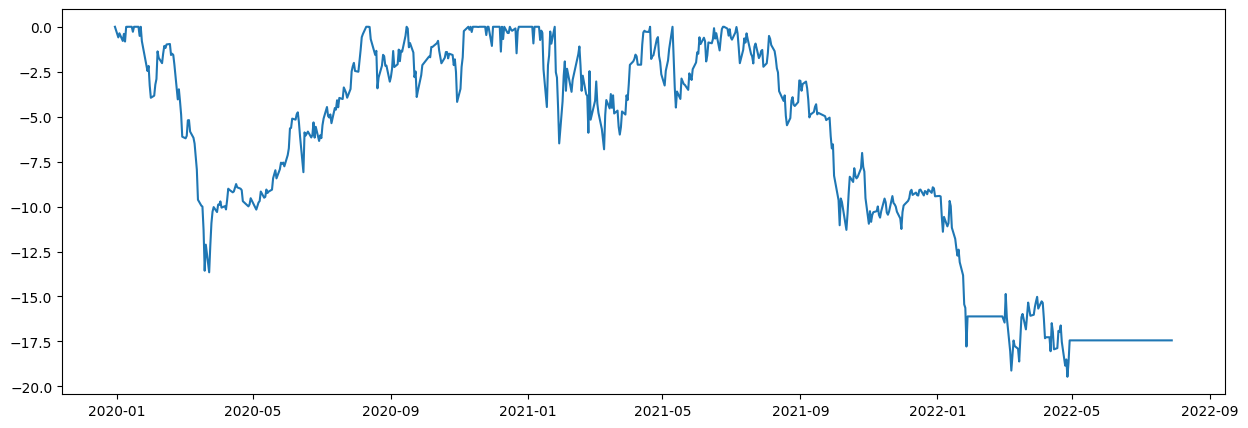

In [25]:
pd.set_option("display.max_colwidth", 20)

#data trunc
weight12_trunc = weight12.truncate(before="2019-12-20")
closeDataSet_trunc = closeDataSet.truncate(before="2019-12-20")

_, momentum12CumReturn = getRebalancingPortfolio(closeDataSet=closeDataSet_trunc, weightDf=weight12_trunc)

print(f"12개월 평균 모멘텀 스코어 최종수익률: {momentum12CumReturn.iloc[-1]}")
cagr12, dd12, mdd12 = getEval(momentum12CumReturn)

**6개월 평균 모멘텀 스코어 투자 비중을 이용한 백테스트**

6개월 평균 모멘텀 스코어 최종수익률: 1.2150424523834844
return: 1.2150424523834844 
 cagr: 1.0798414880009577 
 mdd: 15.900267540168075


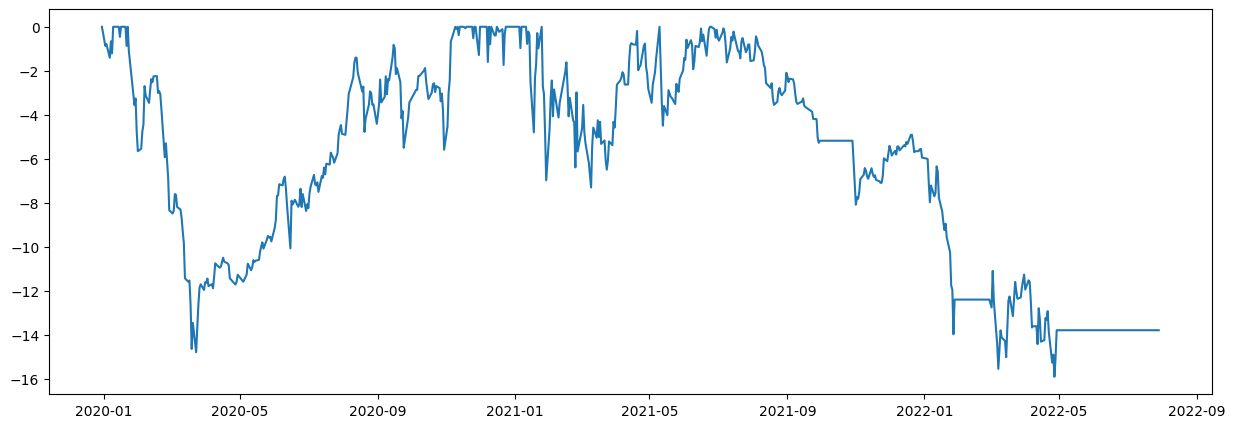

In [26]:
#data trunc
weight6_trunc = weight6.truncate(before="2019-12-20")
closeDataSet_trunc = closeDataSet.truncate(before="2019-12-20")

_, momentum6CumReturn = getRebalancingPortfolio(closeDataSet=closeDataSet_trunc, weightDf=weight6_trunc)

print(f"6개월 평균 모멘텀 스코어 최종수익률: {momentum6CumReturn.iloc[-1]}")
cagr6, dd6, mdd6 = getEval(momentum6CumReturn)

**시장수익률 계산 (코스피200)**

In [27]:
#data trunc
closeDataSet_trunc = closeDataSet.truncate(before="2019-12-20")

rebalDate = getRebalancingDate(closeDataSet_trunc)
rebalDate

DatetimeIndex(['2019-12-30', '2020-01-31', '2020-02-28', '2020-03-31',
               '2020-04-29', '2020-05-29', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-29', '2020-10-30', '2020-11-30',
               '2020-12-30', '2021-01-29', '2021-02-26', '2021-03-31',
               '2021-04-30', '2021-05-31', '2021-06-30', '2021-07-30',
               '2021-08-31', '2021-09-30', '2021-10-29', '2021-11-30',
               '2021-12-30', '2022-01-28', '2022-02-28', '2022-03-31',
               '2022-04-29', '2022-05-31', '2022-06-30', '2022-07-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

시장 최종수익률: 1.154627780946948
return: 1.154627780946948 
 cagr: 1.0583395236136592 
 mdd: 34.64316275885675


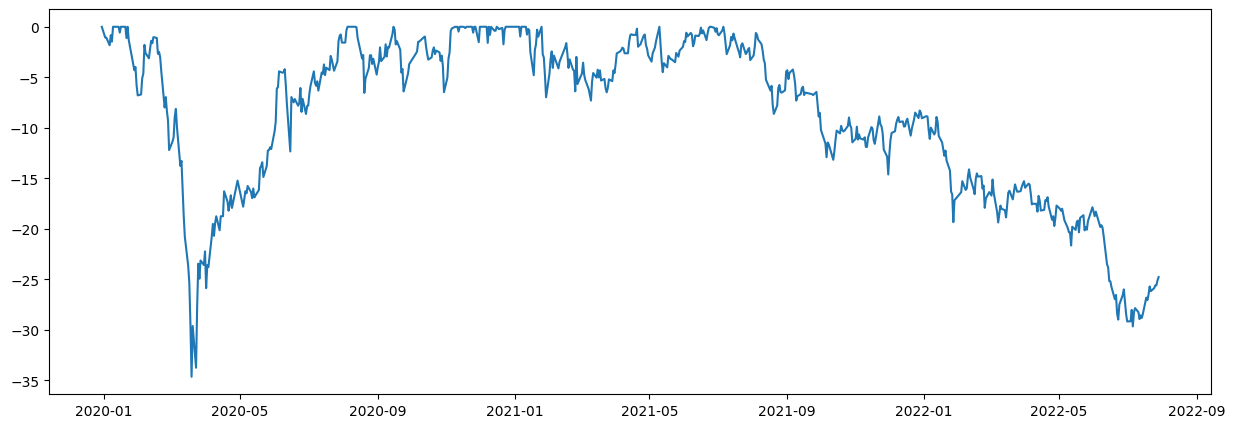

In [28]:
stockCumReturn = getCumulativeReturn(kodex200.loc[rebalDate[0]:])

print(f"시장 최종수익률: {stockCumReturn.iloc[-1]}")
stockCagr, stockDD, stockMDD = getEval(stockCumReturn)

**시각화 비교**

### 6개월 모멘텀은 7월부터 시작되야함?
### 12개월 dd는 

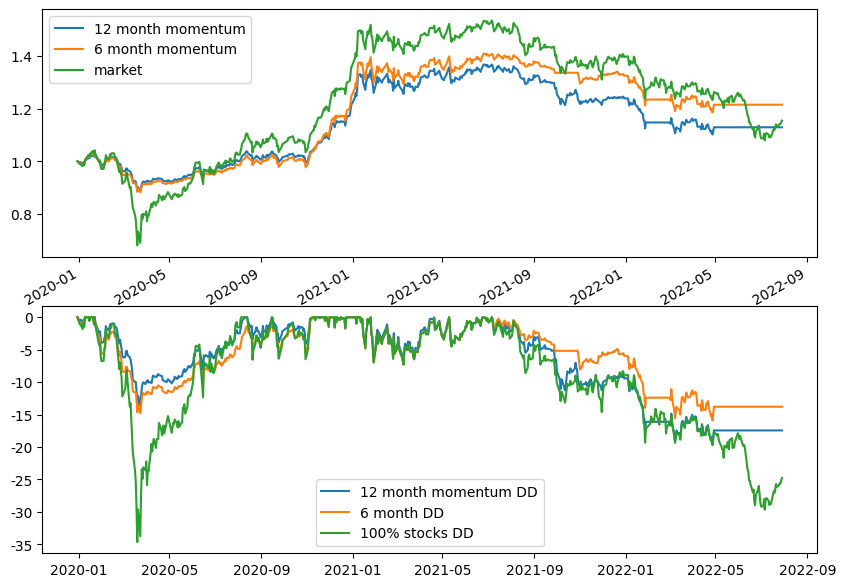

In [30]:
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10,12))

#data cleaning
# momentum12CumReturn =  momentum12CumReturn.truncate(before="2019-12-20")
# momentum6CumReturn = momentum6CumReturn.truncate(before="2019-12-20")
# stockCumReturn = stockCumReturn.truncate(before="2019-12-20")

# 수익곡선
plt.subplot(2,1,1)
momentum12CumReturn.plot(label="12 month momentum")
momentum6CumReturn.plot(label="6 month momentum")
stockCumReturn.plot(label="market")
plt.legend()

# dd 곡선
plt.subplot(2,1,2)
plt.plot(-dd12, label="12 month momentum DD")
plt.plot(-dd6, label="6 month DD")
plt.plot(-stockDD, label="100% stocks DD")
plt.legend()

plt.show()

### 과제
#### 1. 위의 누적수익률 그래프에서 잘못된 점을 찾아 이를 바로 잡는 코드를 작성하시오.
#### 2. 위의 DD 그래프에서 잘못된 점을 찾아 이를 바로 잡는 코드를 작성하시오.**

# 위 모멘텀 계산이 2020-01-02를 기준으로 +6개월과 +12 개월에 시작하였기 때문에 이를 수정함 